In [1]:
!pip install spacy matplotlib pandas wordcloud seaborn
!python -m spacy download es_core_news_sm

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.9/12.9 MB 101.8 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import spacy
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Configurar matplotlib para mostrar caracteres en espa√±ol
plt.rcParams['font.family'] = 'DejaVu Sans'

In [3]:
def cargar_documento(ruta_archivo):
    """
    Funci√≥n para cargar un documento de texto
    """
    try:
        with open(ruta_archivo, 'r', encoding='utf-8') as archivo:
            contenido = archivo.read()
        return contenido
    except FileNotFoundError:
        print(f"‚ùå Error: No se encontr√≥ el archivo en {ruta_archivo}")
        return None
    except UnicodeDecodeError:
        # Intentar con diferentes codificaciones
        try:
            with open(ruta_archivo, 'r', encoding='latin-1') as archivo:
                contenido = archivo.read()
            return contenido
        except:
            print(f"‚ùå Error: No se pudo leer el archivo {ruta_archivo}")
            return None

# Cargar el documento
ruta_archivo = "/content/IreneVallejo Texto.txt"
texto_original = cargar_documento(ruta_archivo)

In [4]:
texto_original

'Irene Vallejo, la cazadora de libros: cr√≥nica de un encuentro con la nueva integrante de la Academia Colombiana de la Lengua\nLa autora de ‚ÄòEl Infinito en un junco‚Äô visit√≥ Colombia para asistir al congreso de Asocajas. Tambi√©n se posesion√≥ como miembro de la Academia Colombiana de la Lengua.\n\nIrene Vallejo, escritora espa√±ola.\nIrene Vallejo, escritora espa√±ola. | Foto: Foto: James Rajotte\n\nSantiago Cruz Hoyos\n12 de oct de 2024, 08:54 p. m.\n\nActualizado el 12 de oct de 2024, 08:54 p. m.\n\nSigue el canal de El Pa√≠s Cali en WhatsApp\n\nPor Santiago Cruz Hoyos - Editor de Cr√≥nicas y Reportajes\n\nLos lectores a veces cazan libros en lugares insospechados. Irene Vallejo recuerda haber encontrado uno en una carretera. Alguien lo habr√° lanzado de un carro ‚Äì qui√©n sabe ‚Äì y las huellas de los neum√°ticos estaban sobre su lomo. Irene se detuvo y observ√≥ aquella portada atropellada: ‚ÄòLas aventuras de Huckleberry Finn‚Äô, de Mark Twain, dec√≠a.\n\nElla se lo llev√≥ a

**An√°lisis b√°sico de texto**

In [5]:
def analisis_basico(texto):
    """
    Realizar an√°lisis b√°sico del texto
    """
    estadisticas = {
        'total_caracteres': len(texto),
        'total_caracteres_sin_espacios': len(texto.replace(' ', '')),
        'total_palabras': len(texto.split()),
        'total_lineas': len(texto.split('\n')),
        'total_parrafos': len([p for p in texto.split('\n\n') if p.strip()])
    }
    return estadisticas

stats = analisis_basico(texto_original)

print("üìà Estad√≠sticas generales:")
for clave, valor in stats.items():
    print(f"   ‚Ä¢ {clave.replace('_', ' ').title()}: {valor:,}")

print()

üìà Estad√≠sticas generales:
   ‚Ä¢ Total Caracteres: 19,109
   ‚Ä¢ Total Caracteres Sin Espacios: 15,869
   ‚Ä¢ Total Palabras: 3,300
   ‚Ä¢ Total Lineas: 107
   ‚Ä¢ Total Parrafos: 41



In [6]:
def preprocesar_texto(texto, mantener_puntuacion=False):
    """
    Preprocesar el texto eliminando elementos no deseados
    """
    # Convertir a min√∫sculas
    texto_limpio = texto.lower()

    # Eliminar saltos de l√≠nea extras
    texto_limpio = re.sub(r'\n+', ' ', texto_limpio)

    # Eliminar espacios m√∫ltiples
    texto_limpio = re.sub(r'\s+', ' ', texto_limpio)

    if not mantener_puntuacion:
        # Eliminar signos de puntuaci√≥n
        texto_limpio = re.sub(r'[^\w\s]', ' ', texto_limpio)
        texto_limpio = re.sub(r'\s+', ' ', texto_limpio)

    return texto_limpio.strip()

# Preprocesar texto manteniendo puntuaci√≥n para an√°lisis
texto_con_puntuacion = preprocesar_texto(texto_original, mantener_puntuacion=True)
texto_sin_puntuacion = preprocesar_texto(texto_original, mantener_puntuacion=False)

print("‚úÖ Texto preprocesado")
print(f"üìã Texto con puntuaci√≥n (primeros 150 chars):")
print(texto_con_puntuacion[:150] + "...")
print()
print(f"üìã Texto sin puntuaci√≥n (primeros 150 chars):")
print(texto_sin_puntuacion[:150] + "...")
print()

‚úÖ Texto preprocesado
üìã Texto con puntuaci√≥n (primeros 150 chars):
irene vallejo, la cazadora de libros: cr√≥nica de un encuentro con la nueva integrante de la academia colombiana de la lengua la autora de ‚Äòel infinito...

üìã Texto sin puntuaci√≥n (primeros 150 chars):
irene vallejo la cazadora de libros cr√≥nica de un encuentro con la nueva integrante de la academia colombiana de la lengua la autora de el infinito en...



In [8]:
def contar_elementos(texto_original, texto_limpio):
    """
    Contar palabras y signos de puntuaci√≥n
    """
    # Contar palabras
    palabras = texto_limpio.split()
    conteo_palabras = Counter(palabras)

    # Contar signos de puntuaci√≥n
    signos_puntuacion = re.findall(r'[^\w\s]', texto_original)
    conteo_puntuacion = Counter(signos_puntuacion)

    return conteo_palabras, conteo_puntuacion

conteo_palabras, conteo_puntuacion = contar_elementos(texto_original, texto_sin_puntuacion)

# Mostrar las 10 palabras m√°s frecuentes
print("üìä Las 10 palabras m√°s frecuentes:")
for palabra, frecuencia in conteo_palabras.most_common(10):
    print(f"   ‚Ä¢ '{palabra}': {frecuencia} veces")

print()

# Mostrar signos de puntuaci√≥n m√°s frecuentes
print("üìä Signos de puntuaci√≥n m√°s frecuentes:")
for signo, frecuencia in conteo_puntuacion.most_common(5):
    print(f"   ‚Ä¢ '{signo}': {frecuencia} veces")

print()

üìä Las 10 palabras m√°s frecuentes:
   ‚Ä¢ 'de': 171 veces
   ‚Ä¢ 'que': 133 veces
   ‚Ä¢ 'en': 114 veces
   ‚Ä¢ 'la': 96 veces
   ‚Ä¢ 'el': 93 veces
   ‚Ä¢ 'y': 80 veces
   ‚Ä¢ 'a': 73 veces
   ‚Ä¢ 'los': 58 veces
   ‚Ä¢ 'un': 55 veces
   ‚Ä¢ 'libros': 43 veces

üìä Signos de puntuaci√≥n m√°s frecuentes:
   ‚Ä¢ ',': 270 veces
   ‚Ä¢ '.': 148 veces
   ‚Ä¢ '‚Äò': 31 veces
   ‚Ä¢ '‚Äô': 30 veces
   ‚Ä¢ ':': 27 veces



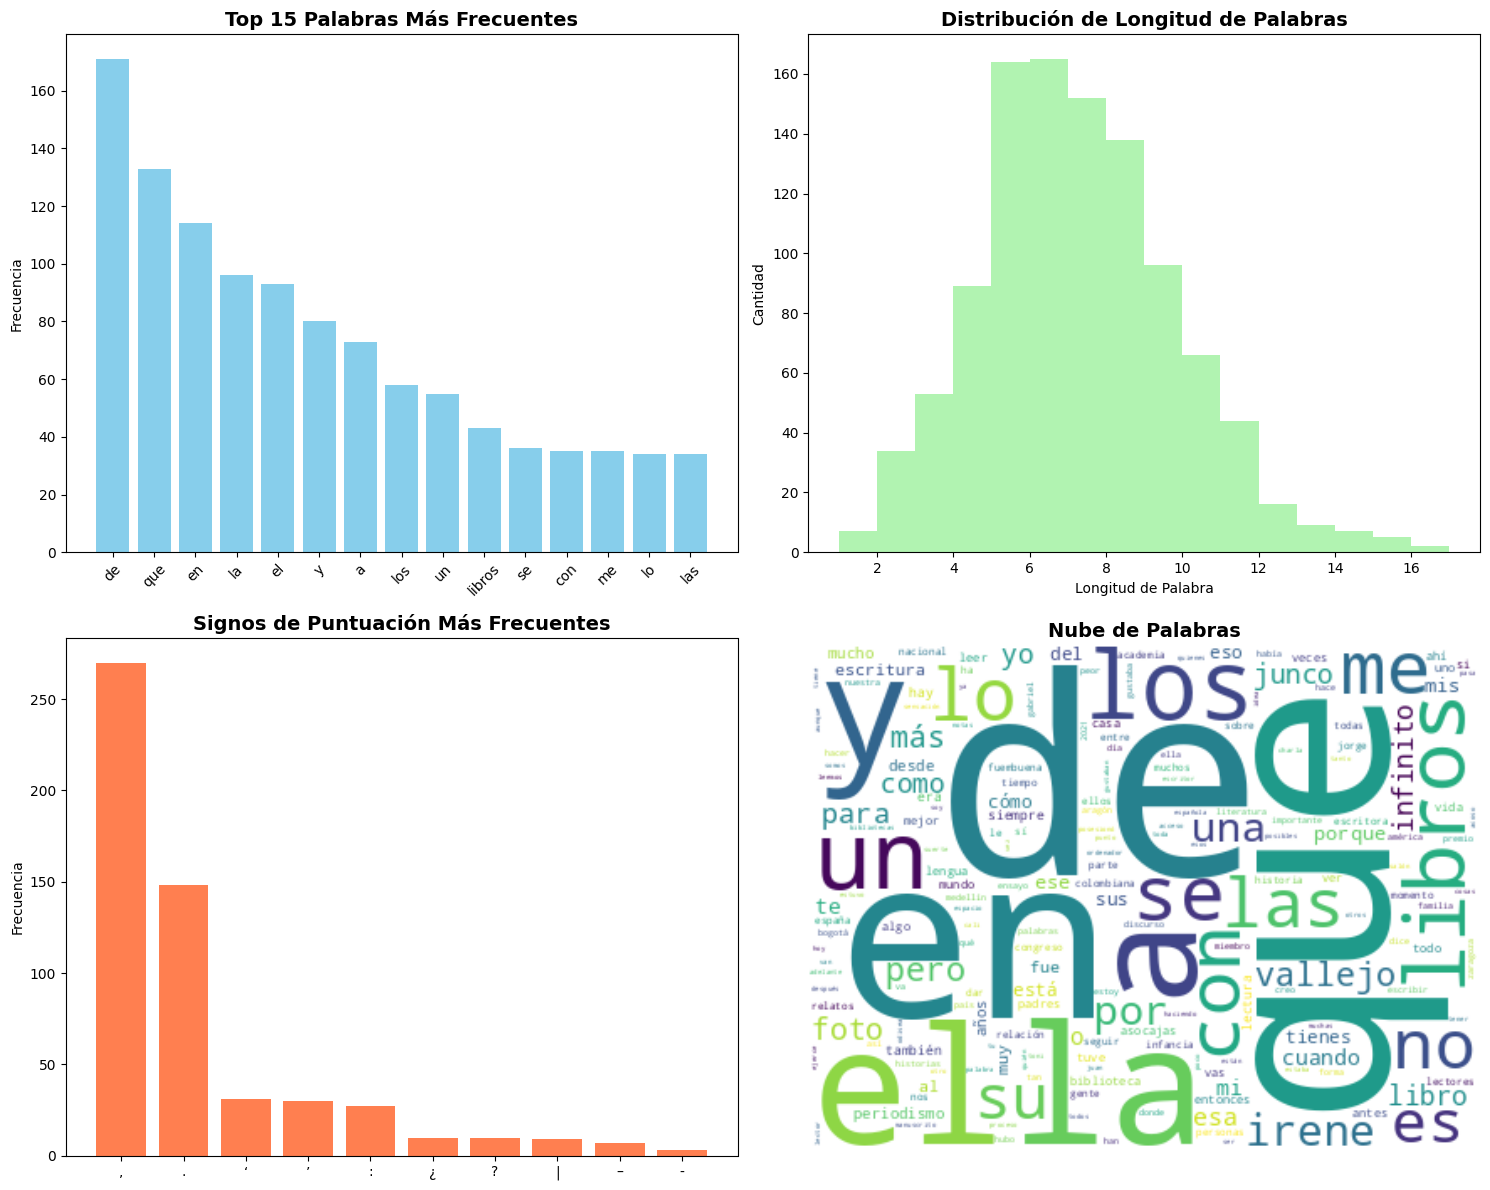

In [9]:
# Crear visualizaci√≥n de palabras frecuentes
def visualizar_frecuencias(conteo_palabras, conteo_puntuacion):
    """
    Crear visualizaciones de frecuencias
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Gr√°fico 1: Top 15 palabras m√°s frecuentes
    palabras_top = dict(conteo_palabras.most_common(15))
    ax1.bar(palabras_top.keys(), palabras_top.values(), color='skyblue')
    ax1.set_title('Top 15 Palabras M√°s Frecuentes', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Frecuencia')
    ax1.tick_params(axis='x', rotation=45)

    # Gr√°fico 2: Distribuci√≥n de longitud de palabras
    longitudes = [len(palabra) for palabra in conteo_palabras.keys()]
    ax2.hist(longitudes, bins=range(1, max(longitudes)+2), color='lightgreen', alpha=0.7)
    ax2.set_title('Distribuci√≥n de Longitud de Palabras', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Longitud de Palabra')
    ax2.set_ylabel('Cantidad')

    # Gr√°fico 3: Signos de puntuaci√≥n
    if conteo_puntuacion:
        signos_top = dict(conteo_puntuacion.most_common(10))
        ax3.bar(signos_top.keys(), signos_top.values(), color='coral')
        ax3.set_title('Signos de Puntuaci√≥n M√°s Frecuentes', fontsize=14, fontweight='bold')
        ax3.set_ylabel('Frecuencia')
    else:
        ax3.text(0.5, 0.5, 'No hay signos de puntuaci√≥n', ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Signos de Puntuaci√≥n', fontsize=14, fontweight='bold')

    # Gr√°fico 4: Nube de palabras
    if len(conteo_palabras) > 0:
        wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(conteo_palabras)
        ax4.imshow(wordcloud, interpolation='bilinear')
        ax4.axis('off')
        ax4.set_title('Nube de Palabras', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

visualizar_frecuencias(conteo_palabras, conteo_puntuacion)

In [10]:
# Cargar el modelo de spaCy para espa√±ol
try:
    nlp = spacy.load("es_core_news_sm")
    print("‚úÖ Modelo de spaCy cargado correctamente")
except OSError:
    print("‚ùå Error: Modelo de spaCy no encontrado. Ejecuta: python -m spacy download es_core_news_sm")
    nlp = None

if nlp:
    # Procesar el texto con spaCy
    doc = nlp(texto_original)

    # Extraer tokens
    tokens = [token.text for token in doc if not token.is_space]
    tokens_sin_puntuacion = [token.text for token in doc if not token.is_punct and not token.is_space]
    tokens_lematizados = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop]

    print(f"üìä Total de tokens: {len(tokens)}")
    print(f"üìä Tokens sin puntuaci√≥n: {len(tokens_sin_puntuacion)}")
    print(f"üìä Tokens lematizados (sin stopwords): {len(tokens_lematizados)}")

    print(f"\nüìã Primeros 15 tokens:")
    print(tokens[:15])

    print(f"\nüìã Primeros 15 tokens sin puntuaci√≥n:")
    print(tokens_sin_puntuacion[:15])

    print(f"\nüìã Primeros 15 tokens lematizados:")
    print(tokens_lematizados[:15])

    print()

‚úÖ Modelo de spaCy cargado correctamente
üìä Total de tokens: 3829
üìä Tokens sin puntuaci√≥n: 3289
üìä Tokens lematizados (sin stopwords): 1372

üìã Primeros 15 tokens:
['Irene', 'Vallejo', ',', 'la', 'cazadora', 'de', 'libros', ':', 'cr√≥nica', 'de', 'un', 'encuentro', 'con', 'la', 'nueva']

üìã Primeros 15 tokens sin puntuaci√≥n:
['Irene', 'Vallejo', 'la', 'cazadora', 'de', 'libros', 'cr√≥nica', 'de', 'un', 'encuentro', 'con', 'la', 'nueva', 'integrante', 'de']

üìã Primeros 15 tokens lematizados:
['Irene', 'Vallejo', 'cazadora', 'libro', 'cr√≥nica', 'encuentro', 'integrante', 'Academia', 'Colombiana', 'Lengua', 'autora', 'Infinito', 'junco', 'visitar', 'Colombia']



üîç PASO 7: An√°lisis morfol√≥gico...
--------------------------------------------------
üìä An√°lisis de categor√≠as gramaticales (POS):
   ‚Ä¢ NOUN: 632 tokens
   ‚Ä¢ DET: 507 tokens
   ‚Ä¢ ADP: 473 tokens
   ‚Ä¢ PUNCT: 468 tokens
   ‚Ä¢ VERB: 424 tokens
   ‚Ä¢ PRON: 310 tokens
   ‚Ä¢ PROPN: 309 tokens
   ‚Ä¢ ADV: 153 tokens
   ‚Ä¢ ADJ: 150 tokens
   ‚Ä¢ AUX: 145 tokens
   ‚Ä¢ CCONJ: 117 tokens
   ‚Ä¢ SCONJ: 110 tokens
   ‚Ä¢ NUM: 17 tokens
   ‚Ä¢ SYM: 11 tokens
   ‚Ä¢ INTJ: 3 tokens

üìã Muestra del an√°lisis detallado (primeras 10 filas):
   token    lemma   pos   tag  is_alpha  is_stop  is_punct
   Irene    Irene PROPN PROPN      True    False     False
 Vallejo  Vallejo PROPN PROPN      True    False     False
       ,        , PUNCT PUNCT     False    False      True
      la       el   DET   DET      True     True     False
cazadora cazadora  NOUN  NOUN      True    False     False
      de       de   ADP   ADP      True     True     False
  libros    libro  NOUN  NOUN      

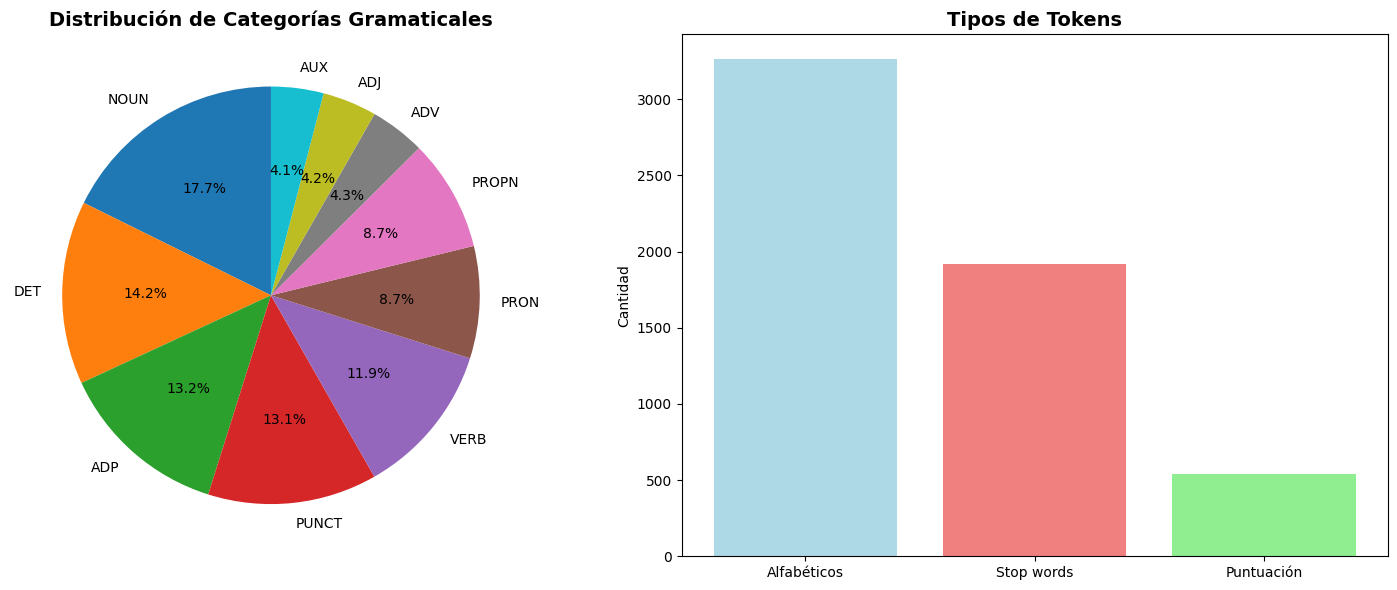

In [13]:
# PASO 7: AN√ÅLISIS MORFOL√ìGICO
# ============================================================================
print("üîç PASO 7: An√°lisis morfol√≥gico...")
print("-" * 50)

def analizar_morfologia(doc):
    """
    Analizar caracter√≠sticas morfol√≥gicas del texto
    """
    pos_tags = [token.pos_ for token in doc if not token.is_space]
    pos_counter = Counter(pos_tags)

    # Crear DataFrame para an√°lisis detallado
    datos_tokens = []
    for token in doc:
        if not token.is_space:
            datos_tokens.append({
                'token': token.text,
                'lemma': token.lemma_,
                'pos': token.pos_,
                'tag': token.tag_,
                'is_alpha': token.is_alpha,
                'is_stop': token.is_stop,
                'is_punct': token.is_punct
            })

    df_tokens = pd.DataFrame(datos_tokens)
    return pos_counter, df_tokens

pos_counter, df_tokens = analizar_morfologia(doc)

print("üìä An√°lisis de categor√≠as gramaticales (POS):")
for pos, count in pos_counter.most_common():
    print(f"   ‚Ä¢ {pos}: {count} tokens")

print(f"\nüìã Muestra del an√°lisis detallado (primeras 10 filas):")
print(df_tokens.head(10).to_string(index=False))

# Visualizar an√°lisis morfol√≥gico
def visualizar_morfologia(pos_counter, df_tokens):
    """
    Crear visualizaciones del an√°lisis morfol√≥gico
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Gr√°fico 1: Distribuci√≥n de POS tags
    pos_data = dict(pos_counter.most_common(10))
    ax1.pie(pos_data.values(), labels=pos_data.keys(), autopct='%1.1f%%', startangle=90)
    ax1.set_title('Distribuci√≥n de Categor√≠as Gramaticales', fontsize=14, fontweight='bold')

    # Gr√°fico 2: Comparaci√≥n de tipos de tokens
    tipos_tokens = {
        'Alfab√©ticos': len(df_tokens[df_tokens['is_alpha'] == True]),
        'Stop words': len(df_tokens[df_tokens['is_stop'] == True]),
        'Puntuaci√≥n': len(df_tokens[df_tokens['is_punct'] == True])
    }

    ax2.bar(tipos_tokens.keys(), tipos_tokens.values(), color=['lightblue', 'lightcoral', 'lightgreen'])
    ax2.set_title('Tipos de Tokens', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Cantidad')

    plt.tight_layout()
    plt.show()

visualizar_morfologia(pos_counter, df_tokens)

print()

üìä Se encontraron 225 entidades nombradas:

üè∑Ô∏è PER:
   ‚Ä¢ Actualizado (aparece 1 vez/veces)
   ‚Ä¢ Tambi√©n (aparece 2 vez/veces)
   ‚Ä¢ Fernando Carrillo (aparece 1 vez/veces)
   ‚Ä¢ Hab√≠a (aparece 1 vez/veces)
   ‚Ä¢ Foto Jorge Fuembuena (aparece 2 vez/veces)
   ‚Ä¢ Pensaban (aparece 1 vez/veces)
   ‚Ä¢ Heraldo de Arag√≥n (aparece 2 vez/veces)
   ‚Ä¢ Gabriel Garc√≠a M√°rquez (aparece 2 vez/veces)
   ‚Ä¢ M√°s (aparece 1 vez/veces)
   ‚Ä¢ Juan Gabriel V√°squez (aparece 2 vez/veces)
   ‚Ä¢ Juana de Ibarbourou (aparece 1 vez/veces)
   ‚Ä¢ Evelio Rosero (aparece 1 vez/veces)
   ‚Ä¢ Rosa Montero (aparece 1 vez/veces)
   ‚Ä¢ Emily Dickinson (aparece 1 vez/veces)
   ‚Ä¢ Despu√©s (aparece 1 vez/veces)
   ‚Ä¢ Despu√©s Julio Fl√≥rez (aparece 1 vez/veces)
   ‚Ä¢ Irene Vallejo (aparece 19 vez/veces)
   ‚Ä¢ Horacio Quiroga (aparece 1 vez/veces)
   ‚Ä¢ James Rajotte (aparece 1 vez/veces)
   ‚Ä¢ jam√°s (aparece 1 vez/veces)
   ‚Ä¢ Fernando Vallejo (aparece 1 vez/veces)
   ‚Ä¢ Foto Jorge Fue

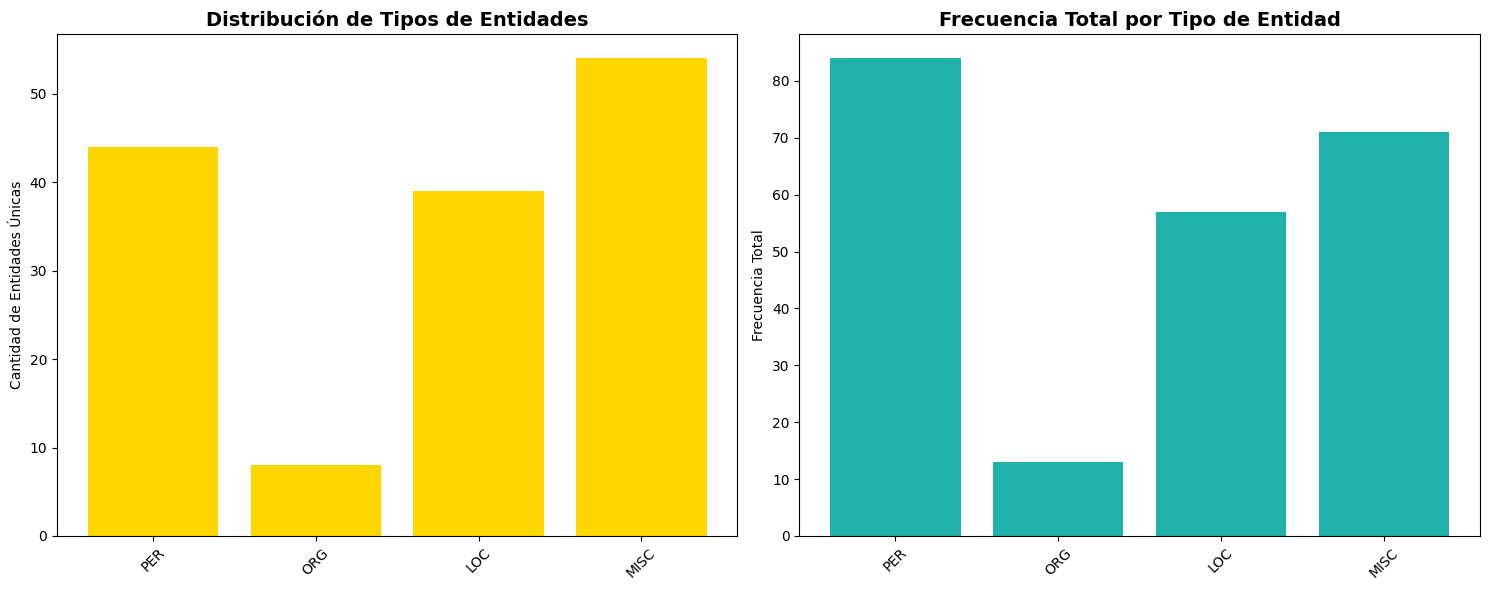


üìÑ TEXTO CON ENTIDADES RESALTADAS:
**[Irene Vallejo](PER)**, la cazadora de libros: cr√≥nica de un encuentro con la nueva integrante de la **[Academia Colombiana de la Lengua
La autora de](ORG)** **[‚Äò](PER)**El **[Infinito](PER)** en un junco‚Äô visit√≥ **[Colombia](LOC)** para asistir al congreso de **[Asocajas](LOC)**. **[Tambi√©n](PER)** se posesion√≥ como miembro de la **[Academia Colombiana de la Lengua](ORG)**.

**[Irene Vallejo](PER)**, escritora espa√±ola.
**[Irene Vallejo](PER)**, escritora espa√±ola. | **[Foto: Foto:](MISC)** **[James Rajotte](PER)**

**[Santiago Cruz Hoyos](LOC)**
12 de oct de 2024, 08:54 p. m.

**[Actualizado](PER)** el 12 de oct de 2024, 08:54 p. m.

**[Sigue](PER)** el canal de El **[Pa√≠s Cali](LOC)** en **[WhatsApp](LOC)**

Por **[Santiago Cruz Hoyos - Editor de Cr√≥nicas](LOC)** y **[Reportajes](LOC)**

Los lectores a veces cazan libros en lugares insospechados. **[Irene Vallejo](PER)** recuerda haber encontrado uno en una carretera. **[Alguien](L

In [14]:
if nlp:
    # Extraer entidades nombradas
    entidades = [(ent.text, ent.label_, ent.start_char, ent.end_char) for ent in doc.ents]

    if entidades:
        print(f"üìä Se encontraron {len(entidades)} entidades nombradas:")
        print()

        # Mostrar entidades por categor√≠a
        entidades_por_tipo = {}
        for texto, etiqueta, inicio, fin in entidades:
            if etiqueta not in entidades_por_tipo:
                entidades_por_tipo[etiqueta] = []
            entidades_por_tipo[etiqueta].append(texto)

        for tipo, lista_entidades in entidades_por_tipo.items():
            print(f"üè∑Ô∏è {tipo}:")
            for entidad in set(lista_entidades):  # Usar set para evitar duplicados
                frecuencia = lista_entidades.count(entidad)
                print(f"   ‚Ä¢ {entidad} (aparece {frecuencia} vez/veces)")
            print()

        # Crear DataFrame de entidades para an√°lisis
        df_entidades = pd.DataFrame(entidades, columns=['Entidad', 'Tipo', 'Inicio', 'Fin'])

        print("üìã Tabla detallada de entidades:")
        print(df_entidades.to_string(index=False))

        # Visualizar entidades
        def visualizar_entidades(entidades_por_tipo, df_entidades):
            """
            Crear visualizaciones de las entidades nombradas
            """
            if not entidades_por_tipo:
                print("No hay entidades para visualizar")
                return

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

            # Gr√°fico 1: Distribuci√≥n por tipo de entidad
            tipos_count = {tipo: len(set(entidades)) for tipo, entidades in entidades_por_tipo.items()}
            ax1.bar(tipos_count.keys(), tipos_count.values(), color='gold')
            ax1.set_title('Distribuci√≥n de Tipos de Entidades', fontsize=14, fontweight='bold')
            ax1.set_ylabel('Cantidad de Entidades √önicas')
            ax1.tick_params(axis='x', rotation=45)

            # Gr√°fico 2: Frecuencia total por tipo
            freq_total = {tipo: len(entidades) for tipo, entidades in entidades_por_tipo.items()}
            ax2.bar(freq_total.keys(), freq_total.values(), color='lightseagreen')
            ax2.set_title('Frecuencia Total por Tipo de Entidad', fontsize=14, fontweight='bold')
            ax2.set_ylabel('Frecuencia Total')
            ax2.tick_params(axis='x', rotation=45)

            plt.tight_layout()
            plt.show()

        visualizar_entidades(entidades_por_tipo, df_entidades)

        # Mostrar texto con entidades resaltadas
        def mostrar_texto_con_entidades(doc):
            """
            Mostrar el texto con las entidades resaltadas
            """
            print("\nüìÑ TEXTO CON ENTIDADES RESALTADAS:")
            print("=" * 60)

            texto_resaltado = doc.text
            # Ordenar entidades por posici√≥n (de atr√°s hacia adelante para no afectar √≠ndices)
            entidades_ordenadas = sorted(doc.ents, key=lambda x: x.start_char, reverse=True)

            for ent in entidades_ordenadas:
                inicio, fin = ent.start_char, ent.end_char
                texto_resaltado = (texto_resaltado[:inicio] +
                                 f"**[{ent.text}]({ent.label_})**" +
                                 texto_resaltado[fin:])

            print(texto_resaltado)
            print("=" * 60)

        mostrar_texto_con_entidades(doc)

    else:
        print("‚ùå No se encontraron entidades nombradas en el texto")

else:
    print("‚ùå No se puede realizar NER sin el modelo de spaCy")

print()